In [1]:
import matplotlib.pyplot as plt
from benchmark_dataset import benchmark

In [2]:
### Parameters

dataset_name = "mnist"
num_classes = 3
num_data_per_class = 1
model_path = "fine_tuning/pretrained_models/bisonai/1shot_3way_bisonai_ckpt_o15t/model.ckpt-99999"
epochs = 5
lr_range = [0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
num_data_train = 10
num_data_test = 10

In [3]:
acc, avg_loss_train, avg_loss_test = benchmark(num_classes,
                num_data_per_class,
                model_path,
                dataset_name,
                epochs,
                lr_range,
                num_data_train,
                num_data_test)

print(acc)

100%|██████████| 6/6 [00:20<00:00,  3.41s/it]

[0.65, 0.69, 0.6799999999999999, 0.63, 0.6399999999999999, 0.61]


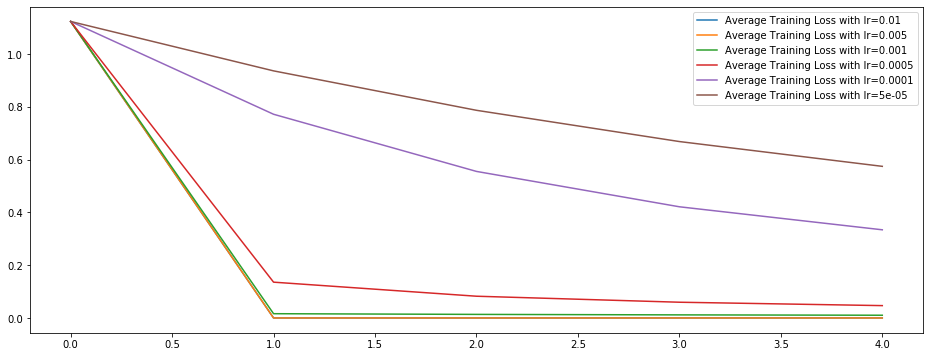

In [6]:
fig = plt.figure(figsize=(16, 6))

for i in range(len(lr_range)):
    plt.plot(range(epochs), avg_loss_train[i], label = "Average Training Loss with lr={}".format(lr_range[i]))

plt.legend()
plt.show()

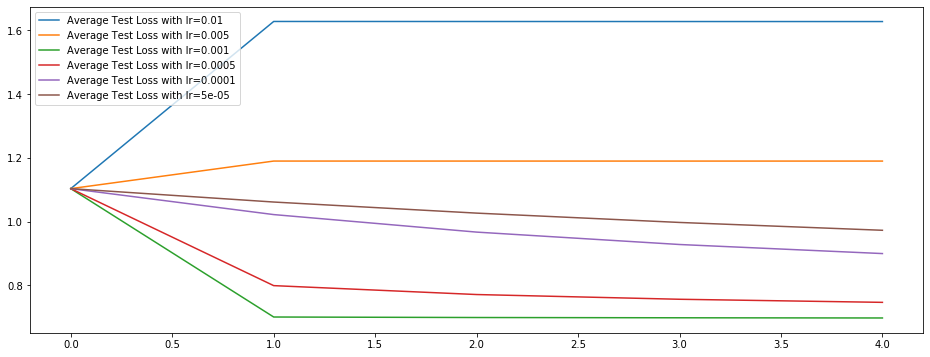

In [5]:
fig = plt.figure(figsize=(16, 6))

for i in range(len(lr_range)):
    plt.plot(range(epochs), avg_loss_test[i], label = "Average Test Loss with lr={}".format(lr_range[i]))

plt.legend()
plt.show()

In [7]:
avg_loss_test

[array([1.10324154, 1.62722742, 1.6271215 , 1.62702071, 1.62694388]),
 array([1.10324154, 1.18964421, 1.18962502, 1.18960582, 1.18959482]),
 array([1.10324154, 0.70081275, 0.69923426, 0.69839742, 0.69779478]),
 array([1.10324154, 0.79918132, 0.77127456, 0.7564432 , 0.74675909]),
 array([1.10324154, 1.0218835 , 0.96695871, 0.92810758, 0.89967928]),
 array([1.10324154, 1.06121861, 1.02647627, 0.99723562, 0.97268166])]